Информация о колонках:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smo

e:\soft\anacond\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
e:\soft\anacond\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
e:\soft\anacond\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
e:\soft\anacond\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  war

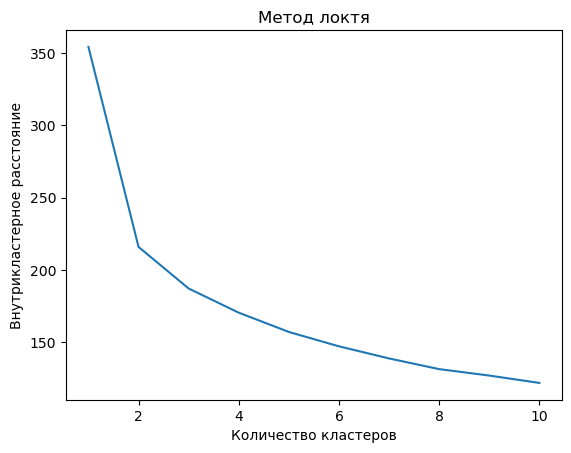

e:\soft\anacond\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
e:\soft\anacond\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


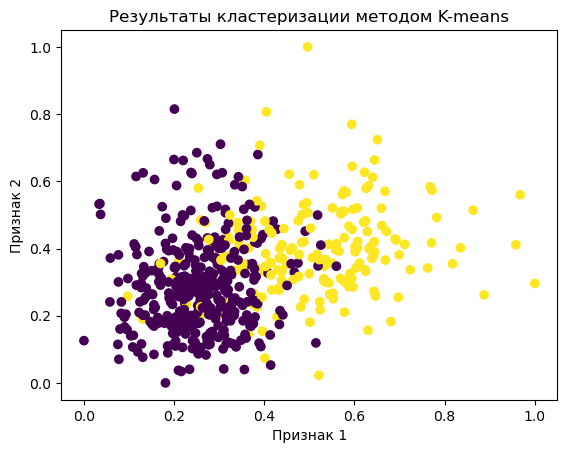

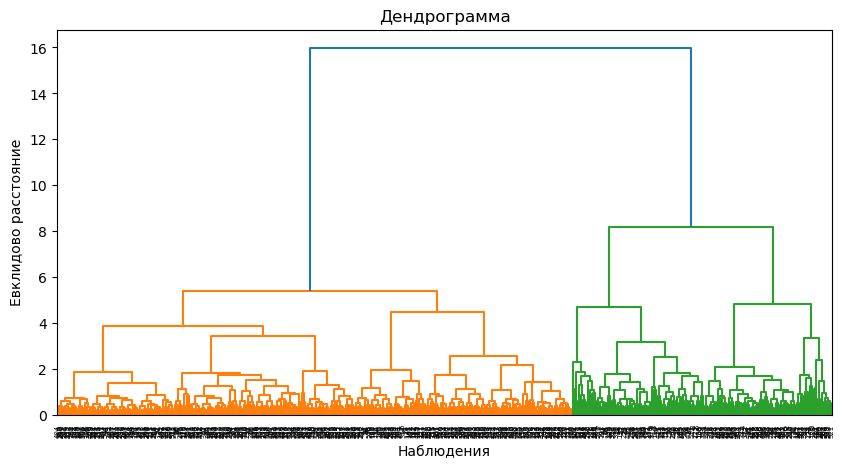

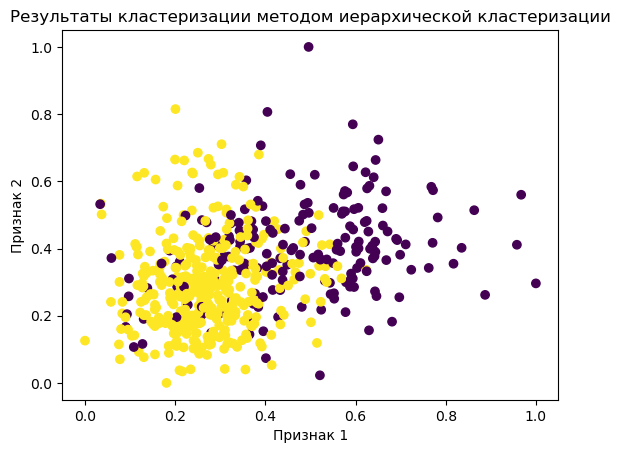

Силуэт для K-means: 0.3845494883485513
Силуэт для иерархической кластеризации: 0.36706054267114924


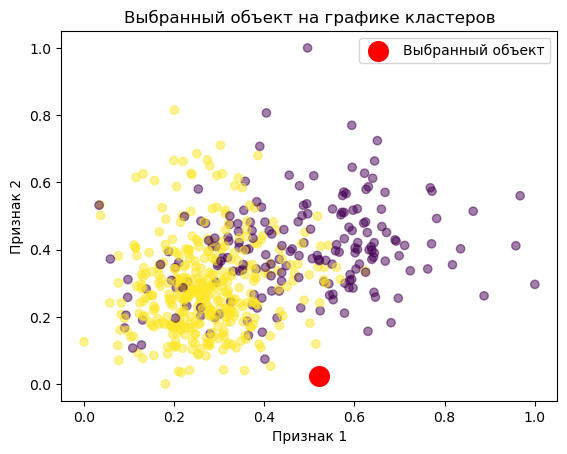

In [10]:
# task1 --------------------------------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

# task2 --------------------------------------------------
data = load_breast_cancer()

df = pd.DataFrame(data.data, columns=data.feature_names)

print("Информация о колонках:")
print(df.info())

print("\nПервые несколько строк датасета:")
print(df.head())

# task3 --------------------------------------------------
print("\nПропуски в данных:", df.isnull().sum().sum())

# task4 --------------------------------------------------
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df)

# task5 --------------------------------------------------
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Метод локтя')
plt.xlabel('Количество кластеров')
plt.ylabel('Внутрикластерное расстояние')
plt.show()

n_clusters = 2

kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
kmeans.fit(X_scaled)
labels_kmeans = kmeans.labels_

# task6 --------------------------------------------------
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_kmeans, cmap='viridis')
plt.title('Результаты кластеризации методом K-means')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.show()

# task7 --------------------------------------------------
linkage_matrix = linkage(X_scaled, method='ward')

# task8 --------------------------------------------------
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix)
plt.title('Дендрограмма')
plt.xlabel('Наблюдения')
plt.ylabel('Евклидово расстояние')
plt.show()

n_clusters_agg = 2

agg_cluster = AgglomerativeClustering(n_clusters=n_clusters_agg, linkage='ward')
labels_agg = agg_cluster.fit_predict(X_scaled)

# task9 --------------------------------------------------
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_agg, cmap='viridis')
plt.title('Результаты кластеризации методом иерархической кластеризации')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.show()

# task10 -------------------------------------------------
# Выводим оценку качество кластеризации методами K-means и иерархической кластеризации методом силуэтов
silhouette_kmeans = silhouette_score(X_scaled, labels_kmeans)
silhouette_agg = silhouette_score(X_scaled, labels_agg)

print("Силуэт для K-means:", silhouette_kmeans)
print("Силуэт для иерархической кластеризации:", silhouette_agg)

# task11 -------------------------------------------------
chosen_index = 0
chosen_point = X_scaled[chosen_index]

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_agg, cmap='viridis', alpha=0.5)
plt.scatter(chosen_point[0], chosen_point[1], c='red', marker='o', s=200, label='Выбранный объект')

plt.title('Выбранный объект на графике кластеров')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.legend()
plt.show()
